In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import misc

In [2]:
boxes = [100,88,253,209]
img = mpimg.imread('bPawn0.jpg')

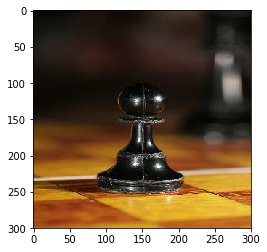

In [3]:
plt.imshow(img.reshape(300,300,3))
plt.show()

In [4]:
box = np.ones([1,1,4])

In [5]:
for i in range(4):
    box[:,:,i] = boxes[i]/300

In [6]:
img = img.reshape(1,300,300,3)

In [7]:
img = tf.convert_to_tensor(img, np.float32)

In [8]:
box = tf.convert_to_tensor(box, np.float32)

In [9]:
test = tf.image.draw_bounding_boxes(img, box)

In [10]:
sess = tf.Session()

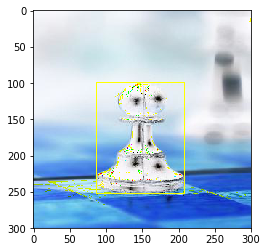

In [11]:
image = (sess.run(test).reshape(300,300,3))
plt.imshow(image)
plt.show()

In [12]:
# Matplot messes up RGB can use OpenCV to fix use scipy instead
misc.imshow(image)

/home/justin/envs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imshow` is deprecated!
`imshow` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``matplotlib.pyplot.imshow`` instead.
  


In [13]:
img = tf.reshape(img,[300,300,3])
begin, size, bbox_for_draw = sess.run(tf.image.sample_distorted_bounding_box(
    image_size = tf.shape(img),
    bounding_boxes=box,
    min_object_covered=0.25,
    aspect_ratio_range=[0.75, 1.33],
    area_range=[0.25, 1],
    max_attempts=100,
    use_image_if_no_bounding_boxes=False))
    

In [14]:
boxes = tf.stack([box,bbox_for_draw], axis=2)

In [15]:
image_with_box = tf.image.draw_bounding_boxes(tf.expand_dims(img, 0),
                                                  boxes[-1,:,:,:])
tf.summary.image ('images_with_box', image_with_box)

<tf.Tensor 'images_with_box:0' shape=() dtype=string>

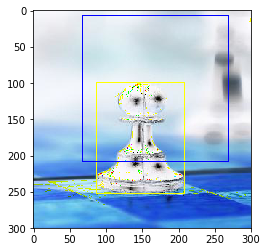

In [16]:
image = sess.run(image_with_box)[-1,:,:,:]
plt.imshow(image)
plt.show()

In [17]:
misc.imshow(image)

/home/justin/envs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imshow` is deprecated!
`imshow` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``matplotlib.pyplot.imshow`` instead.
  """Entry point for launching an IPython kernel.


In [18]:
distorted_image = sess.run(tf.slice(img, begin, size))


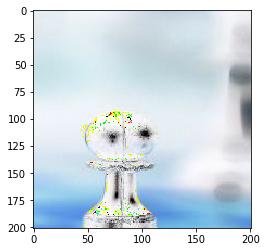

In [19]:
plt.imshow(distorted_image)
plt.show()